<h1 style="color:rgb(0,120,170)"> Constrained Optimization, SVMs</h1><br>

<h3 style="color:rgb(210,90,80)">Calculation 1:</h3>

Suppose we replace in the primal optimization problem of C-SVMs the penalty
term $\|\xi\|_1=\sum_{i=1}^l \xi_i$ with $\|\xi\|_2^2=\sum_{i=1}^l \xi_i^2$ (that is we use the quadratic hinge loss instead). Thus the primal problem we are considering is given as follows:

\begin{align*}
\text{Minimize} \qquad &\frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^l \xi_i^2 \\
\text { subject to } \qquad  &y_i\left(\mathbf{w} \cdot \mathbf{x}_i-b\right) \geq 1-\xi_i \\
\text{and} \qquad &\xi_i \geq 0
\end{align*}

for all $i=1,...,l$. Give the associated dual optimization problem by making use of the KKT-Theorem and perform the following tasks:

* Why can the KKT-Theorem be applied?
* Calculate the Lagrange function.
* Calculate its derivatives (with respect to $w_i$, $b$ and $\xi_i$) and compute their zeros. 
* Write down the dual function (named $\cal L$ in the slides) and the corresponding dual problem.
* Simplify the dual problem so that it only depends on $l$ Lagrange variables. Argue why this can be done.

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

1. Why can the KKT-Theorem be applied?
    
    First of all let's rewrite our constraints:

    \begin{align*}
    \text{Minimize} \qquad &\frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^l \xi_i^2 \\
    \text { subject to } \qquad  -(&y_i\left(\mathbf{w} \cdot \mathbf{x}_i-b\right) - 1+\xi_i)\leq 0 \\
    \text{and} \qquad -&\xi_i \leq 0
    \end{align*}

    We can apply KKT-Theorem because:

    - Our objective function(which we are minimizing) is convex and twice differentiable.
    - Primal feasability: Our constraints are convex and continiously differentiable, that is we can write them as $g(x) \leq 0$ ,where $g(x)$ is convex function. Linear function is convex.
    - Dual feasability: $\alpha_i \geq 0$ and $\lambda_i \geq 0$ for all $i = 1,...,m$ (below in dual function constaints)
    - Slackness condition: $\alpha_i * g(w^*) = 0$ meaning that there exists $w*$ s.t this conditions is fulfilled$


2. Lagrangian function
    
    $L(w,b,\xi_i,...,\xi_l;\alpha_1,...,\alpha_l,\lambda_1,...,\lambda_l) = \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^l \xi_i^2   -\sum_{i=1}^l \alpha_i(y_i\left(\mathbf{w} \cdot \mathbf{x}_i-b\right) - 1+\xi_i) -\sum_{i=1}^l \lambda_i \xi_i$

3. Derivatives of Lagrangian
    
    - $\frac{dL}{dw} = w -\sum_{i=1}^l \alpha_i y_i \cdot \mathbf{x}_i = 0$. 
    - $\frac{dL}{db} = \sum_{i=1}^l \alpha_i y_i = 0 $
    - $\frac{dL}{d\xi_i} = 2C\xi_i - \alpha_j - \lambda_j = 0$

    From derivatives follows:
    - $w = \sum_{i=1}^l \alpha_i y_i \cdot \mathbf{x}_i$
    - $\xi_i = \frac{\alpha_i +  \lambda_i}{2C}$
    
    
    
4. The dual function and the dual problem.
   
   Maximize: 
   
   $\mathcal{L}(\alpha_1 ,....,\alpha_l) = \frac{1}{2}\sum_{i,j} \alpha_i \alpha_j x_i x_j y_i y_j + C \frac{\sum_{i}(\alpha_i +\lambda_i)^2}{4C^2} - \sum_{i,j} \alpha_i \alpha_j x_i x_j y_i y_j + b\sum_{i} \alpha_i y_i + \sum_{i} \alpha_i - \frac{\sum_{i}\alpha_i(\alpha_i +\lambda_i)}{2C} - \frac{\sum_{i}\lambda_i(\alpha_i +\lambda_i)}{2C}$
   
   subject to:

   - $\alpha_i \geq 0$
   - $\lambda_i \geq 0$
   - $\sum_{i=1}^l \alpha_i y_i = 0 $
    
5. Simplify
    
    $\mathcal{L}(\alpha_1 ,....,\alpha_l) = \frac{1}{2}\sum_{i,j} \alpha_i \alpha_j x_i x_j y_i y_j + C \frac{\sum_{i}(\alpha_i +\lambda_i)^2}{4C^2} - \sum_{i,j} \alpha_i \alpha_j x_i x_j y_i y_j + b\sum_{i} \alpha_i y_i + \sum_{i} \alpha_i + \frac{\sum_{i}\alpha_i(\alpha_i +\lambda_i)}{2C} + \frac{\sum_{i}\lambda_i(\alpha_i +\lambda_i)}{2C} = \sum_{i} \alpha_i  - \frac{1}{2}\sum_{i,j} \alpha_i \alpha_j x_i x_j y_i y_j + \frac{\sum_{i}  \alpha_i^2 + 2 \alpha_i \lambda_i + \lambda_i^2}{4C} - \frac{\sum_{i}  \alpha_i^2 + \alpha_i \lambda_i - \alpha_i \lambda_i - \lambda_i^2}{2C} =  \sum_{i} \alpha_i  - \frac{1}{2}\sum_{i,j} \alpha_i \alpha_j x_i x_j y_i y_j + \frac{\sum_{i}  \alpha_i^2 + 2 \alpha_i \lambda_i + \lambda_i^2 - 2 \alpha_i^2 + 2 \lambda_i^2 }{4C}  = \sum_{i} \alpha_i  - \frac{1}{2}\sum_{i,j} \alpha_i \alpha_j x_i x_j y_i y_j + \frac{\sum_{i}  \lambda_i^2 + 2 \alpha_i \lambda_i - \alpha_i^2}{4C}$


<h3 style="color:rgb(210,90,80)">Code 1</h3>

The aim of the following task is to equip you with some intuition concerning the application of different SVMs to an easy data set. <br>
You should also observe how different versions of the SVMs with different hyperparameters react to additional noise. To this end we provided you a function `plot_data`, that is intended to create proper visualizations of important characteristics of linear and nonlinear SVMs, like the decision border and support vectors. <br>
The usual routine for applying SVMs in Python, which is also used here, is given by the following sklearn-package: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. 

Your first task is to get familiar with the `plot_data` function by applying it to the easy data set `radial_data.csv`. Iterate over different kernels and hyperparameters (consider the documentation for details):
* As a first task plot the dataset using the provided functions. 
* Using the sklearn-package mentioned above, write a function `iter_Degree` that applies an SVM with a polynomial kernel and $C=10$ to the data and iterates over the degrees from 1 to 5. Function `iter_Degree` must return a list of models' parameters for each model you initiated and fitted on our data. Model parameters is a dictionary, consult the  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC.get_params">sklearn docs</a> . <br>Apply `plot_data` to each hyperparameter setting.



In [1]:

import matplotlib.pyplot as plt
import random
import csv
import scipy
import matplotlib
import sklearn
import numpy as np
import pandas as pd


print('sklearn version:',sklearn.__version__)
print('pandas version:',pd.__version__)
print('scipy version:',scipy.__version__)
print('numpy version:',np.__version__)
print('pandas version:',pd.__version__)
print('matplotlib version:',matplotlib.__version__)

np.random.seed(1234)  

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn import svm

sklearn version: 1.1.2
pandas version: 1.4.2
scipy version: 1.9.2
numpy version: 1.21.5
pandas version: 1.4.2
matplotlib version: 3.5.1


In [2]:
"""Function allows ro load datapoint from csv
@returns: tuple (X,y)"""
def load_data(id_data=1):
    if id_data ==1:
        Z = np.genfromtxt('radial_data.csv', delimiter=',')
        return Z[:,:-1], Z[:,-1]

"""Function creates space/grid. Mostly used for plotting"""
def get_meshgrid(X,resolution):
    s = np.max(np.abs(X))*1.05
    ls = np.linspace(-s, s, resolution)
    X1,X2 = np.meshgrid(ls, ls, sparse=False)
    return np.c_[X1.ravel(), X2.ravel()]

"""Plotting your data
@param model already trained SVM model, is None if you want to plot data only
all other parameters must be intuitively clear for you"""
def plot_data(X, y, 
              model=None,
              plot_boarders=True, 
              plot_classification=True,  
              plot_support_vectors = True,
              plot_size=7, 
              resolution=500, 
              title='data visualization', 
              color = ['blue','orange']):
    
    if model is not None:#if you want to plot model
        if plot_classification and plot_boarders:
            col=2  #if you want to plot model and boarders
        else :
            col=1  #if you want to plot model only
        
        fig,axs = plt.subplots(1,col,figsize=(plot_size*col,plot_size))
        
        grid = get_meshgrid(X,resolution)        
        V = model.support_vectors_
        mask_sv = model.support_ #np.where(np.isin(X[:,0],V[:,0]))[0] 
        
        kernel = model.kernel
        if kernel == 'poly':
            title = f"kernel: {kernel} - degree: {model.degree} - cost:{model.C}"
        elif kernel == 'rbf':
            title = f"kernel: {kernel}"
            if model.gamma != "auto_deprecated" :
                title+= f" - gamma: {model.gamma}" 
            title += f" - cost: {model.C}"
                
        
        for i in range(col): 
            if col>1:
                ax = axs[i]
            else:
                ax = axs
            ax.set_aspect('equal')
            if i==0 and plot_boarders:
                ax.set_title('Margins - ' + title,fontsize=plot_size*2)
                boarders = model.decision_function(grid)
                mask_pos = boarders >= 1
                mask_neg = boarders <= -1
                ax.scatter(grid[mask_pos,0], grid[mask_pos,1], c=color[0], alpha=0.01, s=10)
                ax.scatter(grid[mask_neg,0], grid[mask_neg,1], c=color[1], alpha=0.01, s=10)
                ax.scatter(X[mask_sv,0], X[mask_sv,1], c='g',label= str(np.sum(model.n_support_)) +' SV',s=40,marker='o')
            if plot_classification and (i==1 or not plot_boarders):
                ax.set_title('Classification - ' + title,fontsize=plot_size*2)
                classification = model.predict(grid)
                mask_pos = classification > 0
                mask_neg = classification < 0
                ax.scatter(grid[mask_pos,0], grid[mask_pos,1], c=color[0], alpha=0.01, s=10)
                ax.scatter(grid[mask_neg,0], grid[mask_neg,1], c=color[1], alpha=0.01, s=10)
                classification = model.predict(X)
                mask_wrong = classification != y 
                ax.scatter(X[mask_wrong,0], X[mask_wrong,1], c='magenta',label=str(np.sum(mask_wrong)) + ' faults',s=40,marker='o')
            m = y > 0
            ax.scatter(X[m,0], X[m,1], c=color[0],label='class +1',s=10)
            m = np.logical_not(m)
            ax.scatter(X[m,0], X[m,1], c=color[1],label='class -1',s=10)
            ax.legend(loc='lower left', fontsize=plot_size*1.5)   
    
    
    else:
        fig,axs = plt.subplots(1,1,figsize=(plot_size,plot_size))
        axs.set_aspect('equal')
        m = y > 0
        axs.scatter(X[m,0], X[m,1], c=color[0],label='class +1',s=10)
        m = np.logical_not(m)
        axs.scatter(X[m,0], X[m,1], c=color[1],label='class -1',s=10)
        axs.legend(loc='lower left', fontsize=plot_size*1.5)
        plt.title(title, fontsize=plot_size*2)
    plt.show()
    return

In [3]:
#load data
X,y = load_data(1)

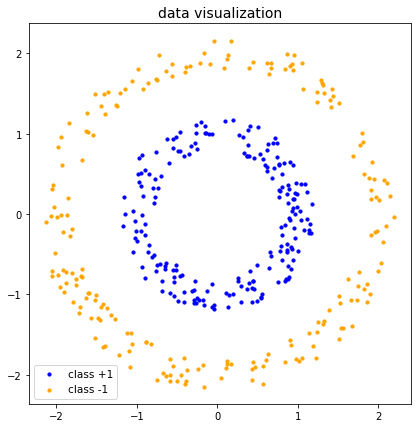

In [4]:
plot_data(X, y)

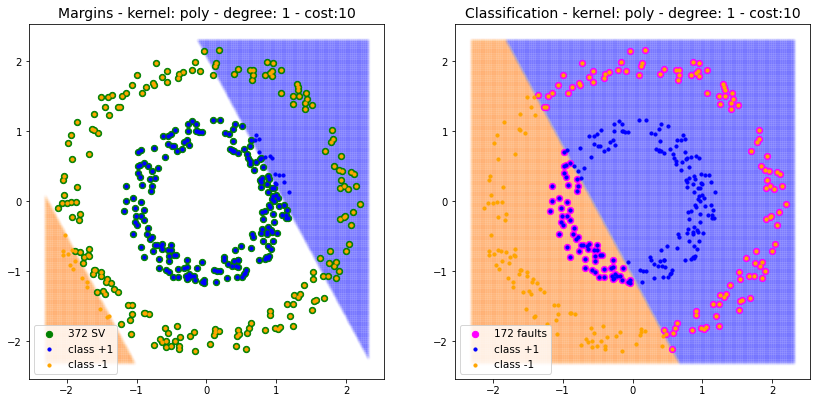

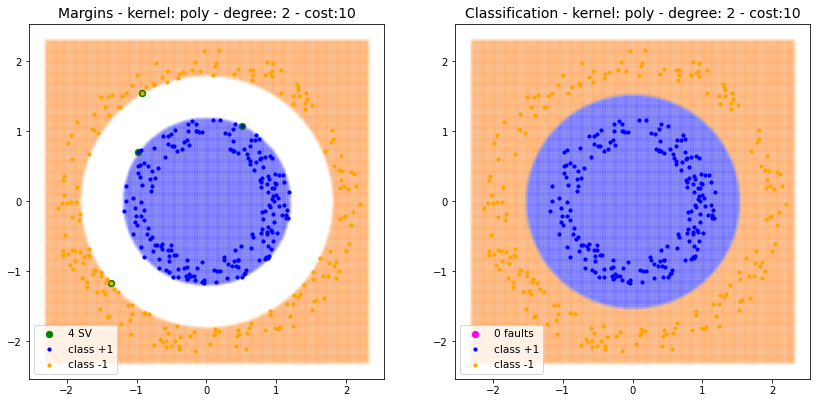

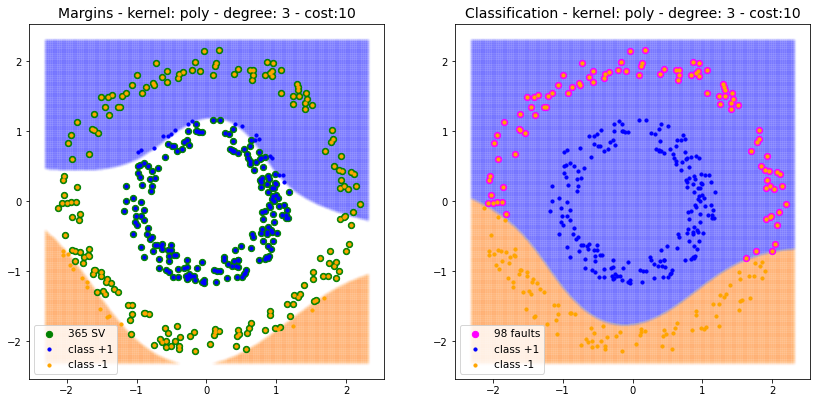

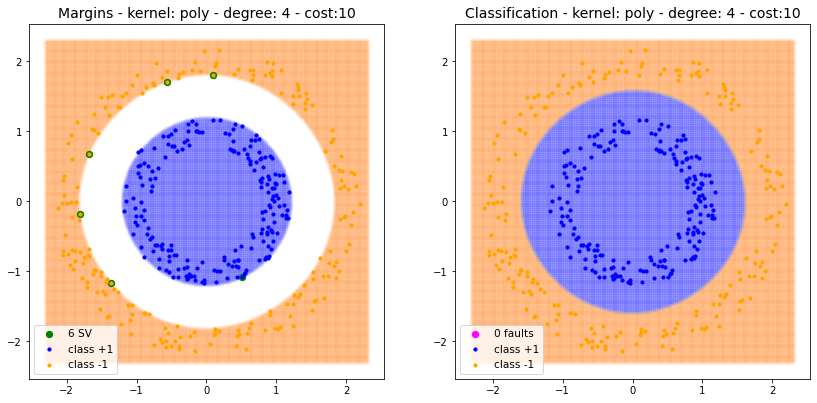

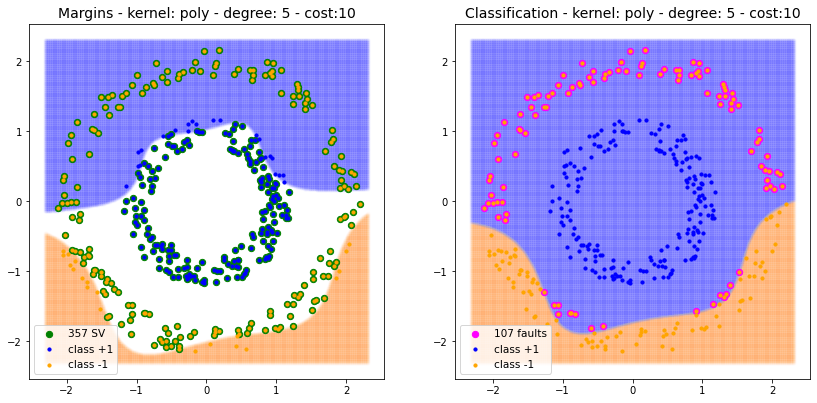

[{'C': 10,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 1,
  'gamma': 'scale',
  'kernel': 'poly',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 {'C': 10,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'poly',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 {'C': 10,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'poly',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 {'C': 10,
  'break_ties': False,
  'cache_size': 200,
  'class_weight

In [5]:
"""
Function iter_Degree fits SVM using defined range of degrees and plots every variation.
@ degree_range: range of integer degrees
@ returns list of dictionaries, lenght of list = length of degree_range
"""
def iter_Degree(degree_range, X, y):
    list_of_models = []
    #your code ↓↓↓
    #code ends here
    for d in range(1,degree_range + 1):
        model = svm.SVC(C = 10,kernel = 'poly',degree = d) 
        model.fit(X,y)
        plot_data(X,y,model)
        list_of_models.append(model.get_params()) 
    
    return list_of_models


degree_range = 5 
iter_Degree(degree_range,X,y)


<h3 style="color:rgb(210,90,80)">Question 1 (5 points):</h3>

What observations can you make from your plots?


_a) The SVM with polynomial degree=2 already seems to do quite well on the data set. </u><br>
_b)  The higher the polynomial degree, the better the classifier. <br>
_c)  A very high number of support vectors seems to be an indicator of a bad choice of the kernel. </u><br>


_d) There is hardly any difference between the pictures that were produced by polynomial kernels of even degree.</u> <br>
_e)  For kernels with an odd degree the number of misclassified samples decreases with an increasing degree. <br>

In [6]:
a_ = True
b_ = False
c_ = False

d_ = True
e_ = False

Now apply an RBF-kernel and vary the $C$-parameter from close to $0$ to a very high value. After playing around a little bit, try to report on your observations in the subsequent question.

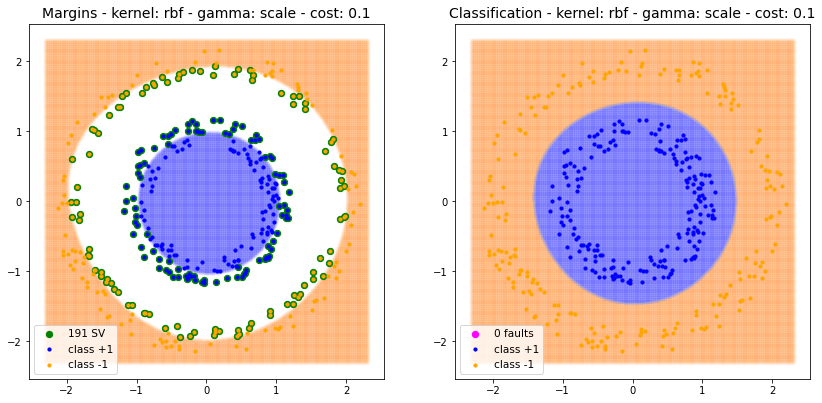

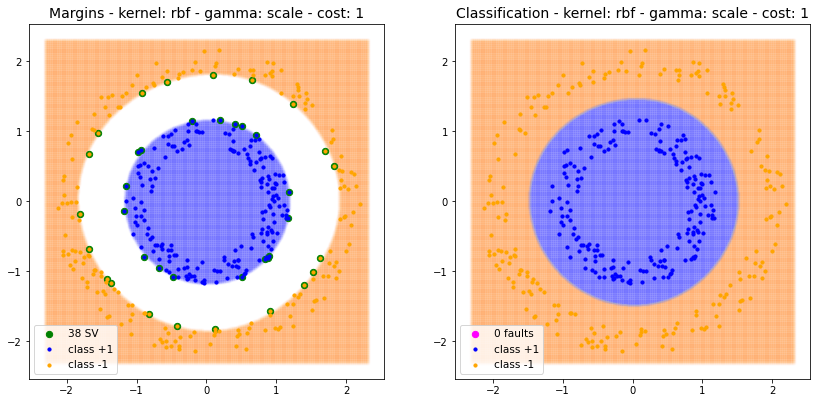

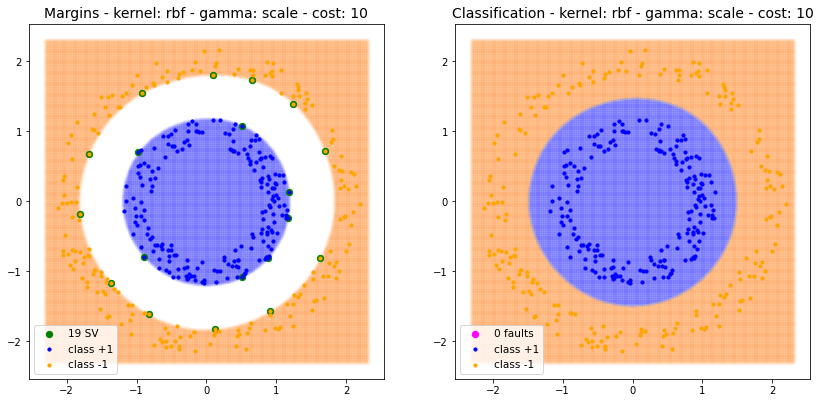

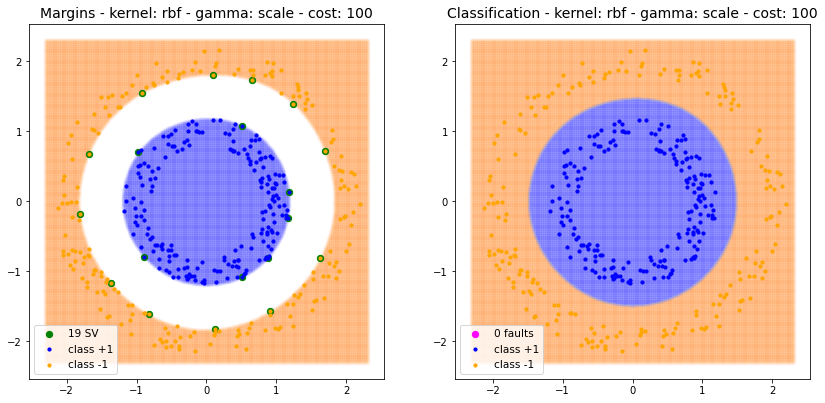

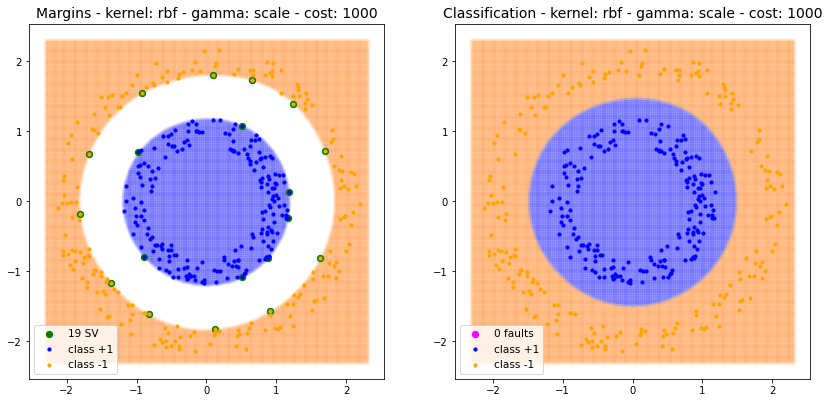

In [7]:
for C in (0.1,1,10,100,1000):
    model = svm.SVC(kernel="rbf",C=C)
    model.fit(X,y)
    plot_data(X,y,model)

<h3 style="color:rgb(210,90,80)">Question 2:</h3>

What observations can you make from your plots? (several options may be correct):

    
_f)  The higher the cost the more support vectors we have. <br>
_g)  The decision boarders don't change drastically with increasing $C$, only the number of support vectors does.</u> <br>

In [8]:
f_ = False
g_ = True

<h3 style="color:rgb(210,90,80)">Code 2:</h3>

* Now use function `pol2cart()` which returns **100 two-dimensional** points which are **uniformly** distributed within the circle of radius $r=0.3$ to generate new data points. Label these points with $-1$ and add them to the main `X` feature matrix and `y` label vector. Your new variables will be `X_new` and `y_new`
* Now use an **rbf kernel** and again play around with the parameter to explore the effects on the classification performance by again appropriately using the `plot_data` function. Write a function `iter_Gamma`, analogous to `iter_Degree`. Try out small costs $C \sim 0.1$ and large costs $ C\sim 1000$ and iterating over different values of $\gamma := 1/(2\sigma^2)$ (compare RBF definition in lecture slides), ranging from $0.1$ to $1$. Again report your observations in the subsequent question.

In [9]:
X,y=load_data(1)
def pol2cart(r, phi):
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return(x, y)

In [10]:
def generate_observations(n):
    res = [pol2cart(0.3,x) for x in range(1,n+1)]
    res = np.asarray(res)
    return res

X_gen, y_gen =  generate_observations(100),np.ones(100) * -1

X_new, y_new = np.concatenate((X,X_gen)), np.concatenate((y,y_gen))

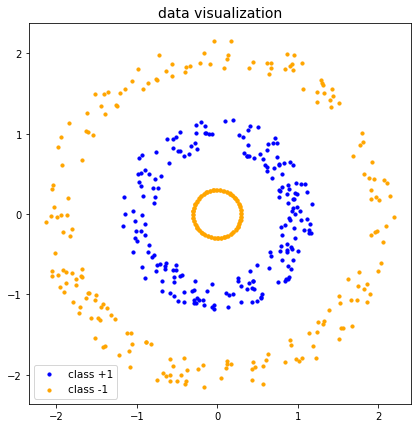

In [11]:
plot_data(X_new, y_new)

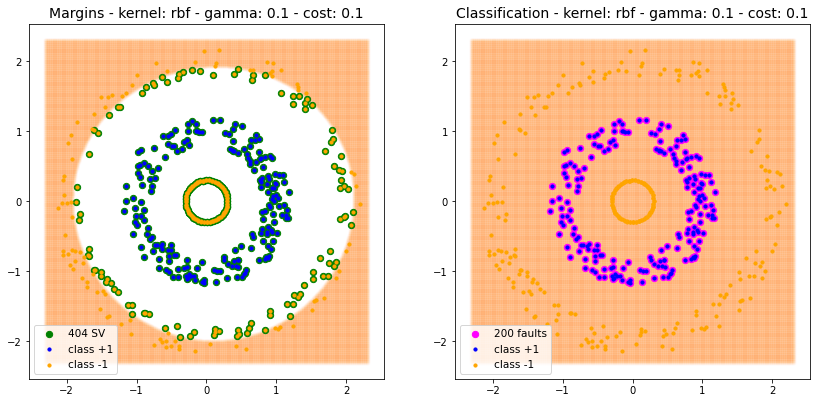

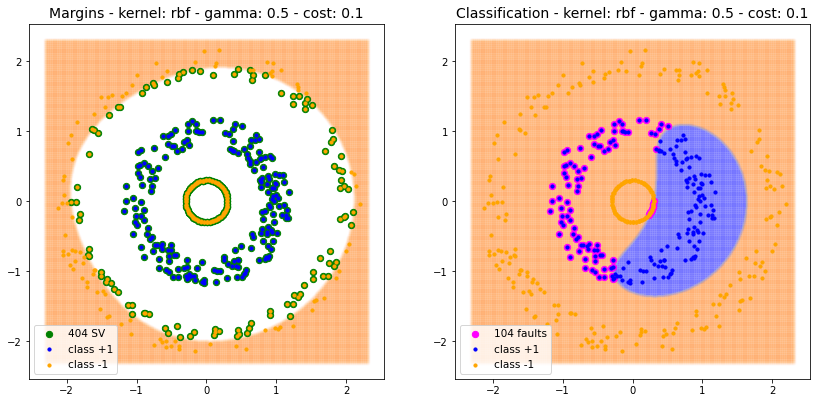

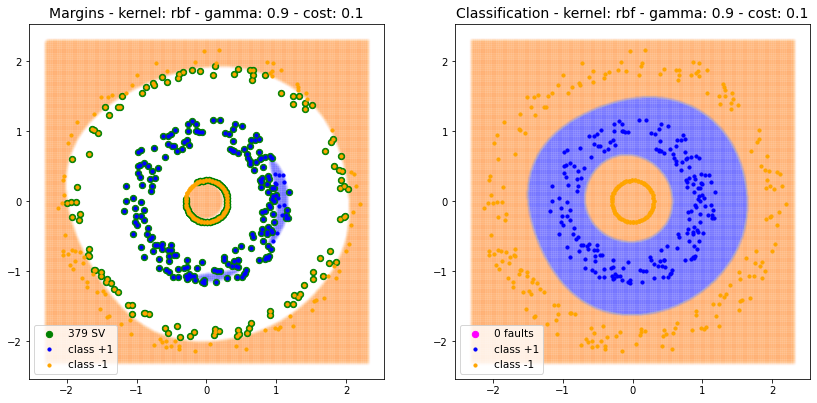

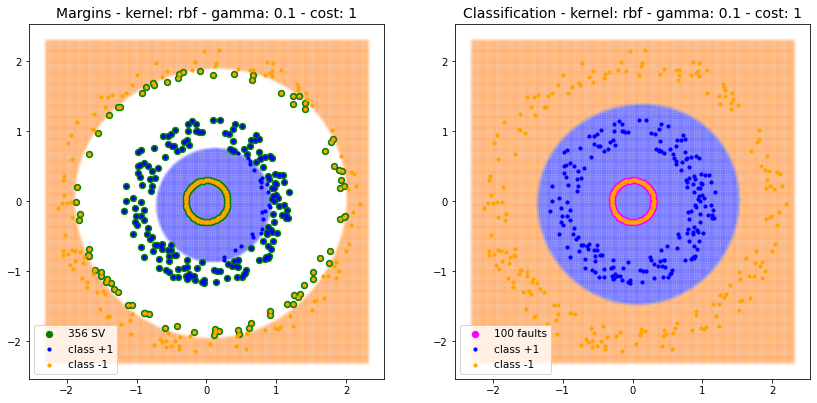

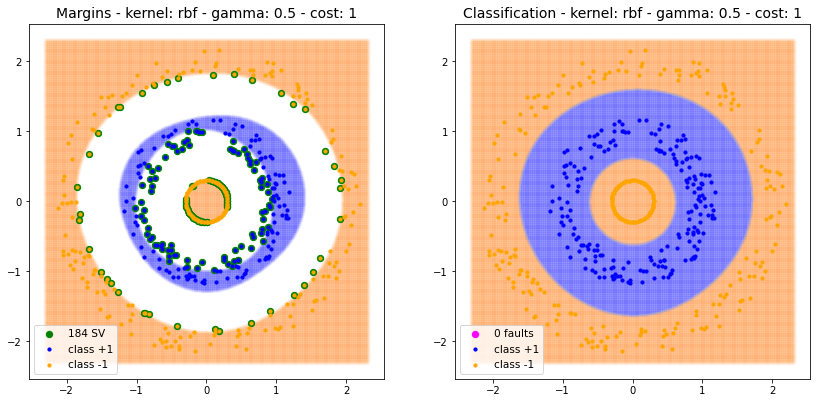

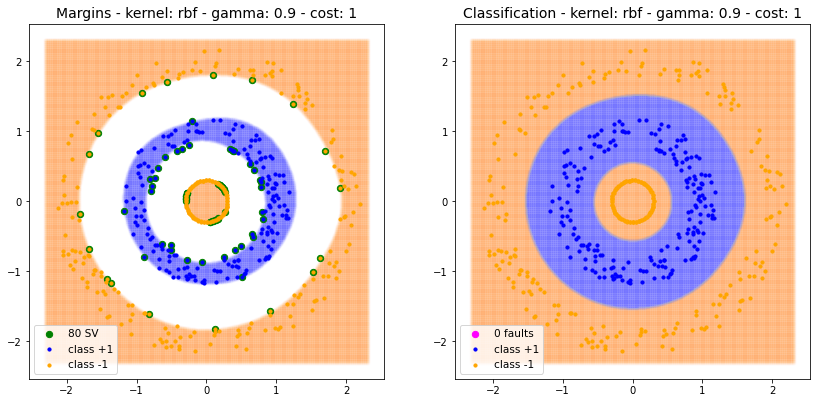

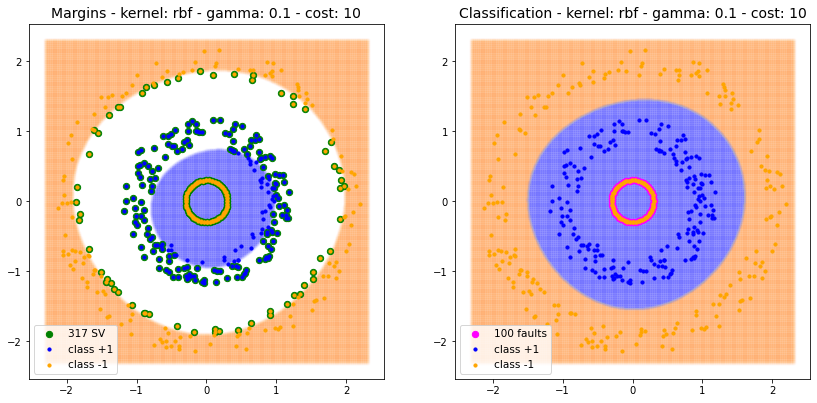

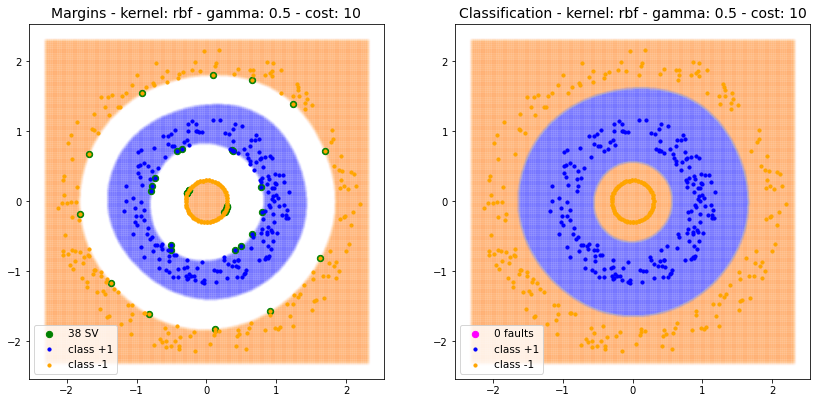

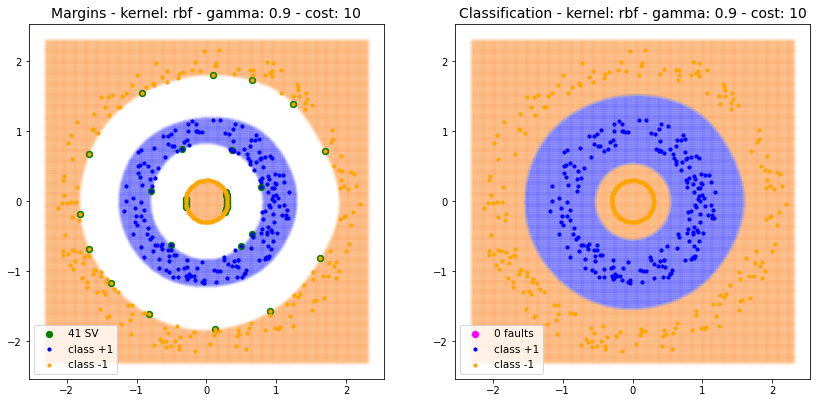

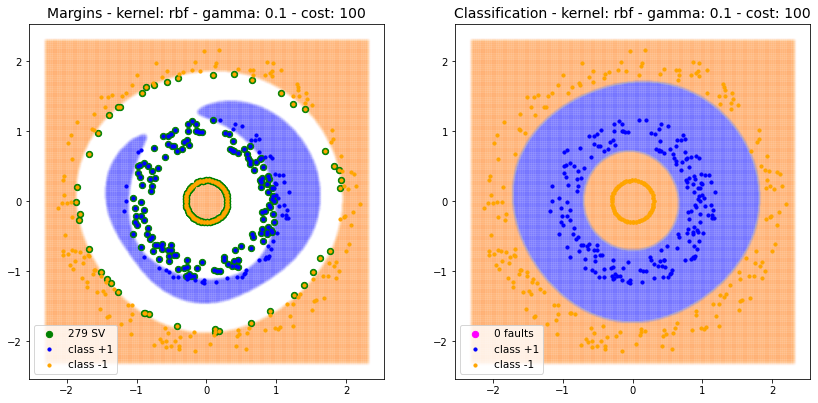

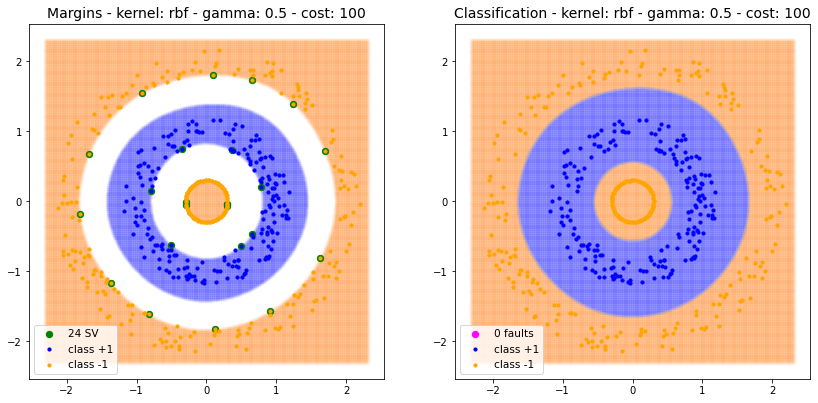

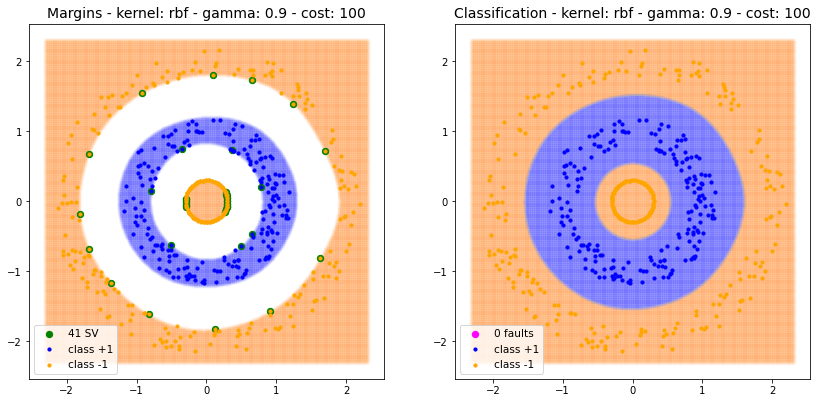

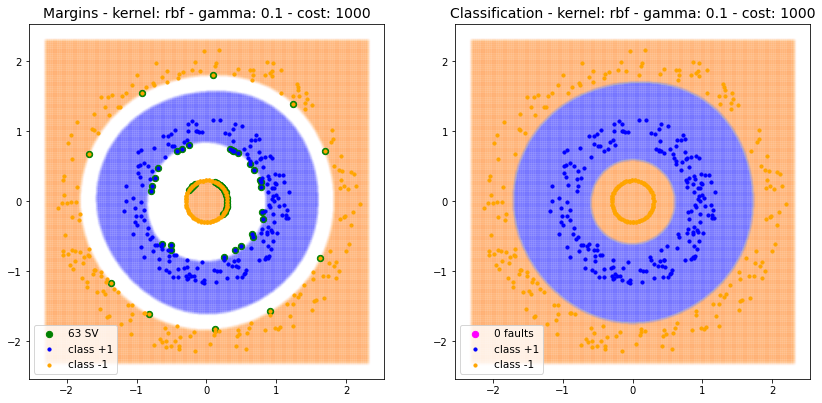

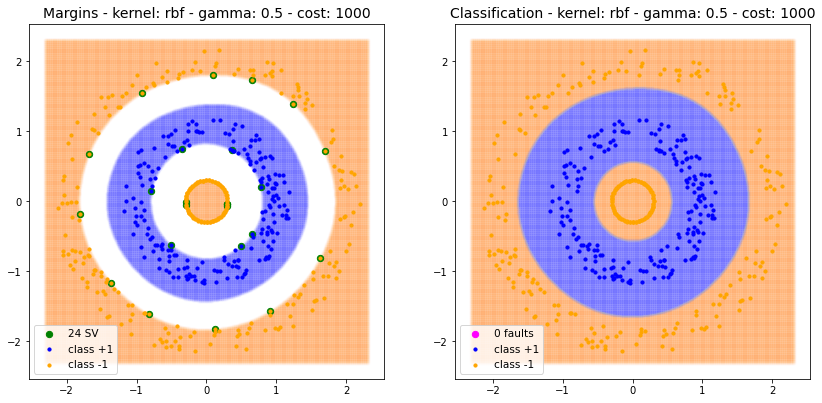

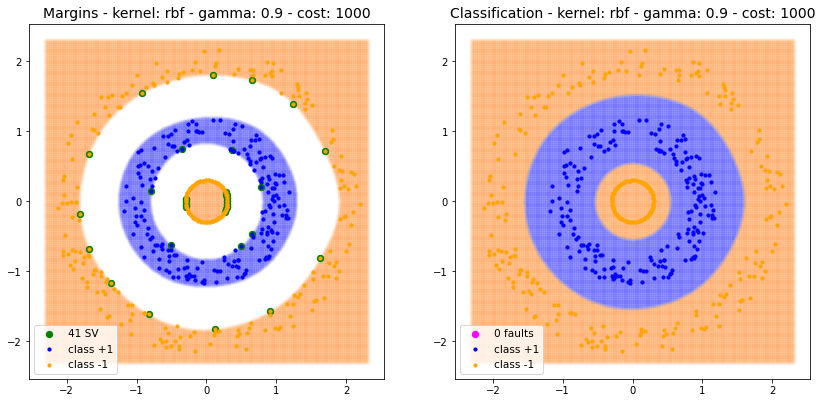

In [12]:
"""
Function iter_Gamma fits SVM using defined gamma range and plots every variation.
@ gamma_range: list of gammas
@ returns: list of dictionaries, lenght of list = length of gamma_range
"""
def iter_Gamma(gamma_range,C,X_new,y_new):
    list_of_models = []
    for gamma in gamma_range:
        model = svm.SVC(C = C,kernel = 'rbf',gamma=gamma) 
        model.fit(X_new,y_new)
        plot_data(X_new,y_new,model)
        list_of_models.append(model.get_params()) 
    
    return list_of_models

cost_values = range(-1,4)
gamma_values = [0.1,0.5,0.9]

for cost in cost_values:
    iter_Gamma(gamma_values,10**cost,X_new,y_new)

<h3 style="color:rgb(210,90,80)">Question 3:</h3>

What observations can you make from your plots? Tick the correct boxes:


_h) For a fixed $\gamma$, the larger the cost, the higher the number of support vectors .<br>
_i )   For relatively large $C$ and relatively large $\gamma$ (say $C \geq 100$ and $\gamma > 0.5$), enlarging $\gamma$ further doens't improve your performance significantly. </u><br>
_j ) For fixed $C$, increasing $\gamma$ usually reduces the model complexity of the SVM. <br>

In [13]:
h_ = False
i_ = True
j_ = True

<h3 style="color:rgb(210,90,80)">Code 3:</h3>

* Finally, we want to investigate, how the RBF kernel classifier reacts to outliers. To this end add a single point $(1.8,1.2)$ to your new data set (with the additional circle around $0$) and label it with $y=+1$. Again plot the data set.?
* Again use an RBF kernel and play around with the parameter to explore the effects on the classification performance by again appropriately using the `plot_data` function. Try out small costs $C \sim 0.1$ and large costs $ C\sim 1000$ and also iterate over different values of $\gamma$, ranging from $0.1$ to $1$. (Reuse iterative functions defined above). Report your observations in the subsequent question. 

In [14]:
# update X_new and y_new by adding point as described in the task↓↓↓

X_gen_2, y_gen_2 =  np.array([[1.8,1.2]]),np.ones(1)

X_new = np.concatenate((X_new,X_gen_2))
y_new = np.concatenate((y_new,y_gen_2))

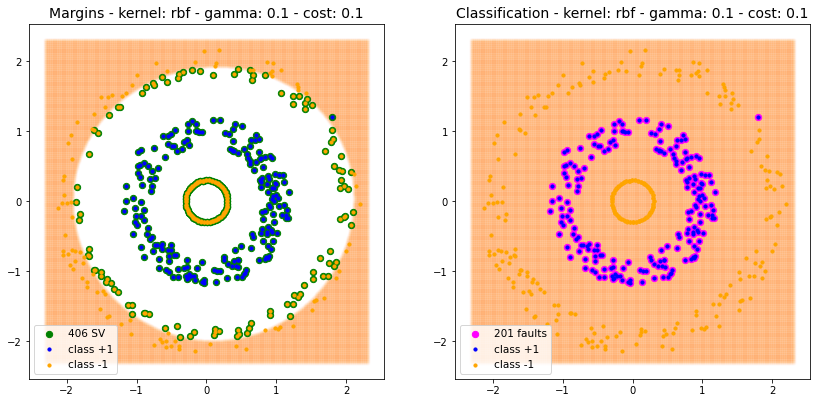

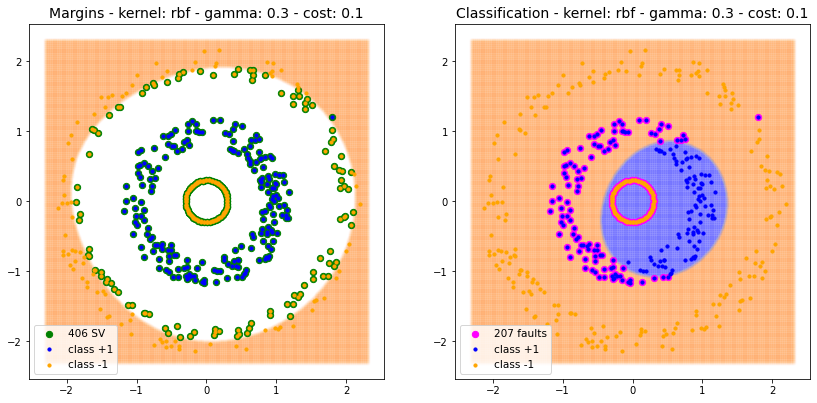

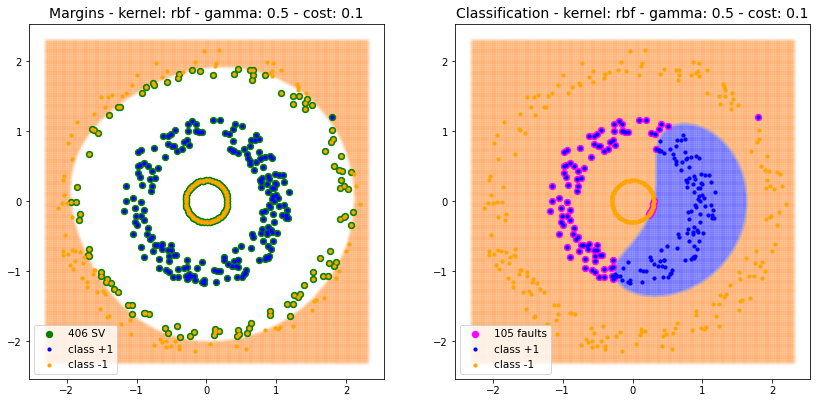

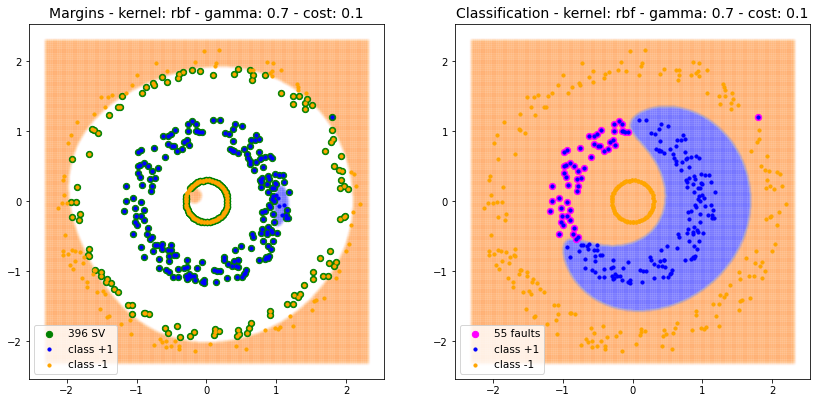

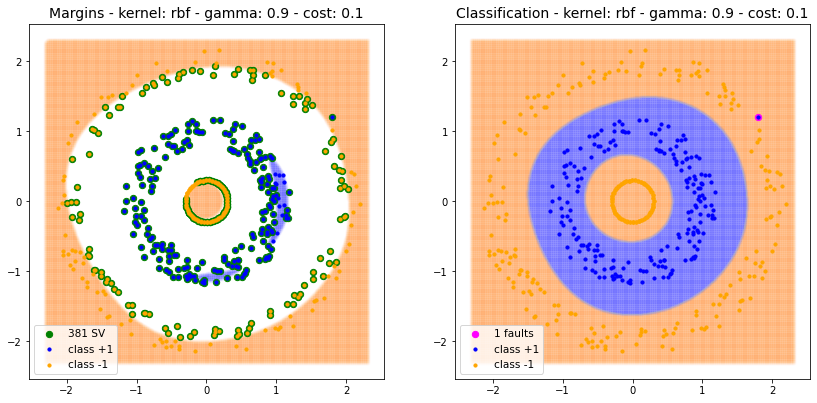

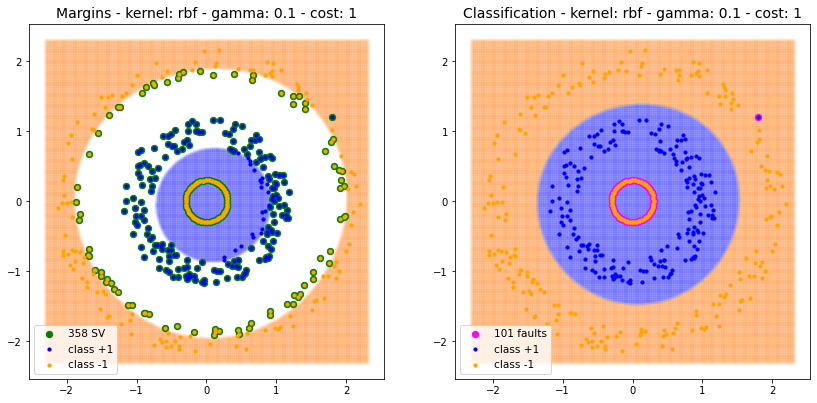

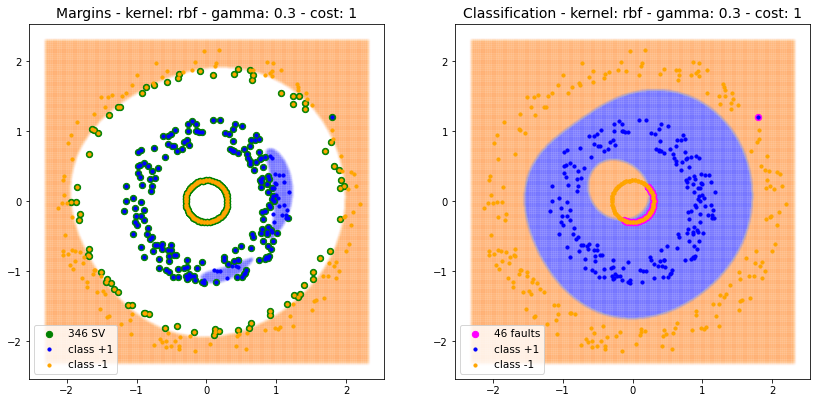

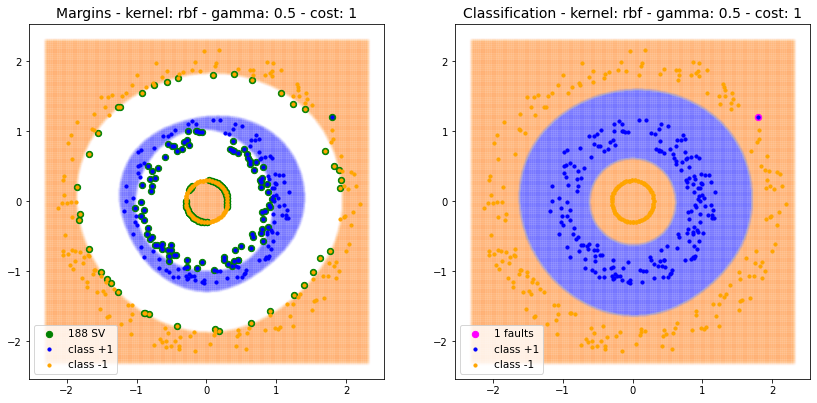

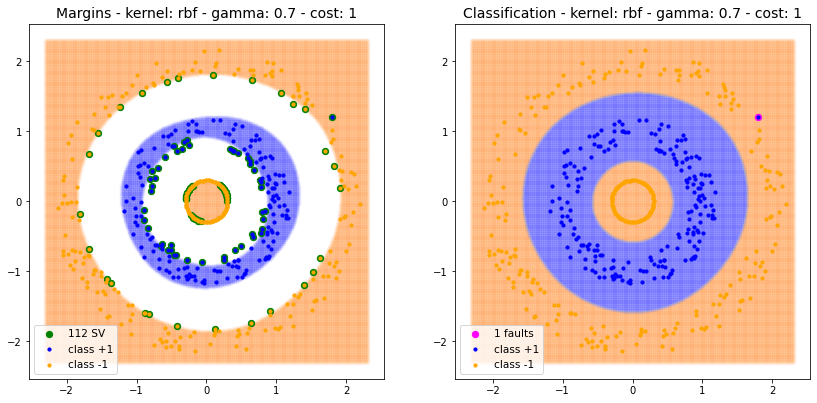

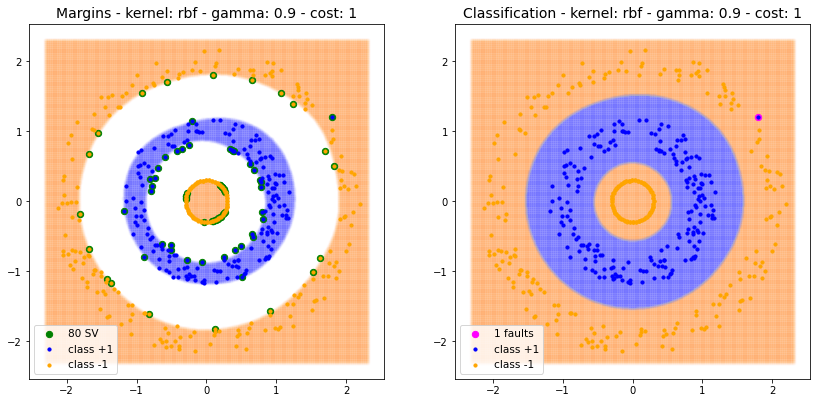

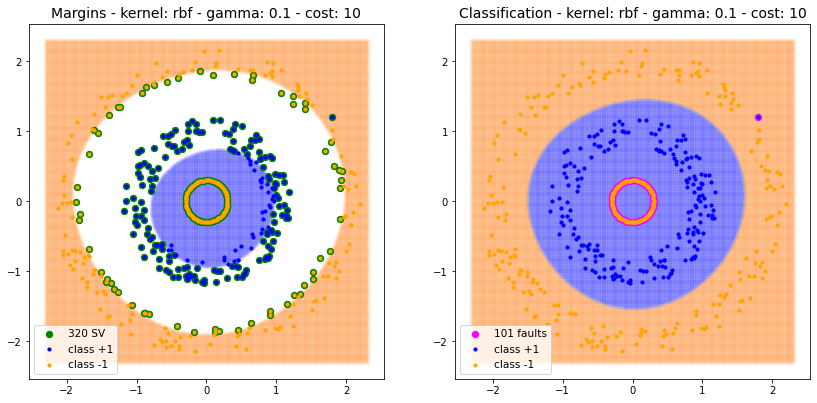

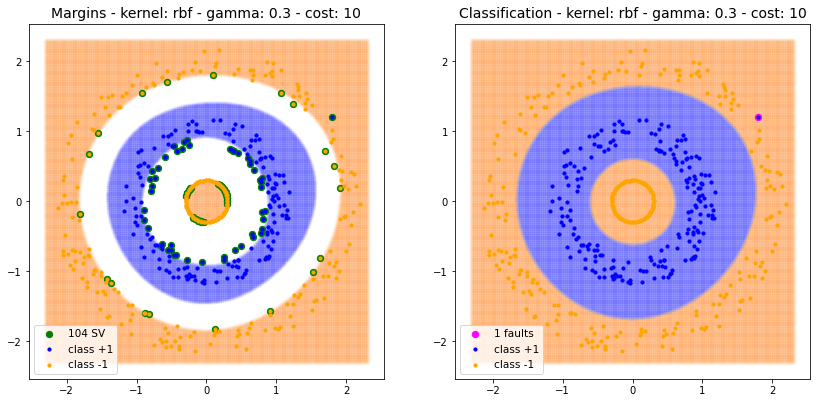

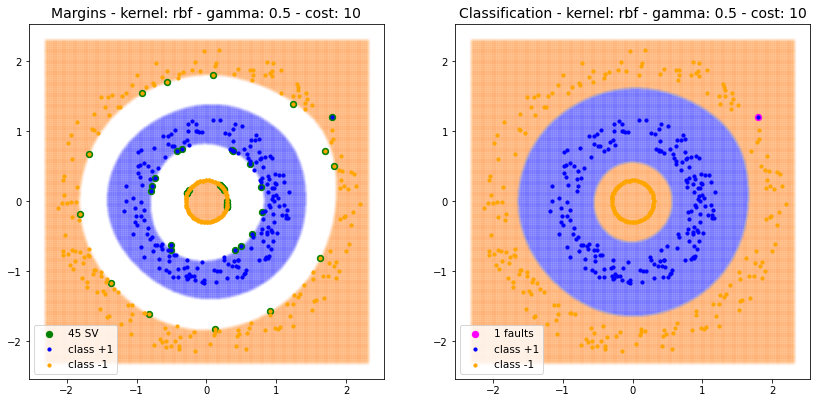

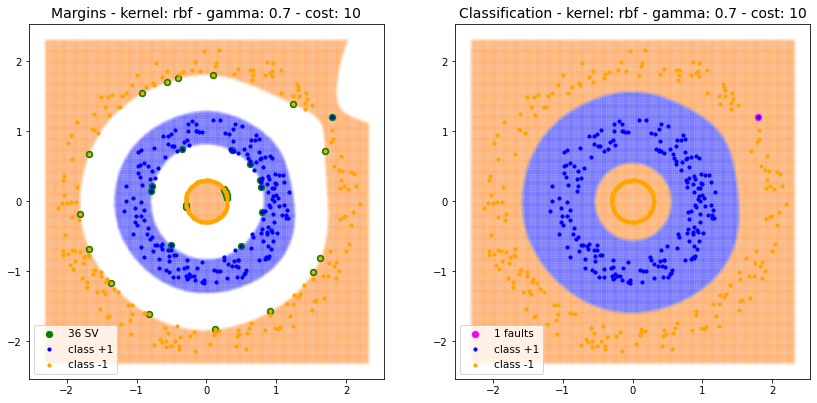

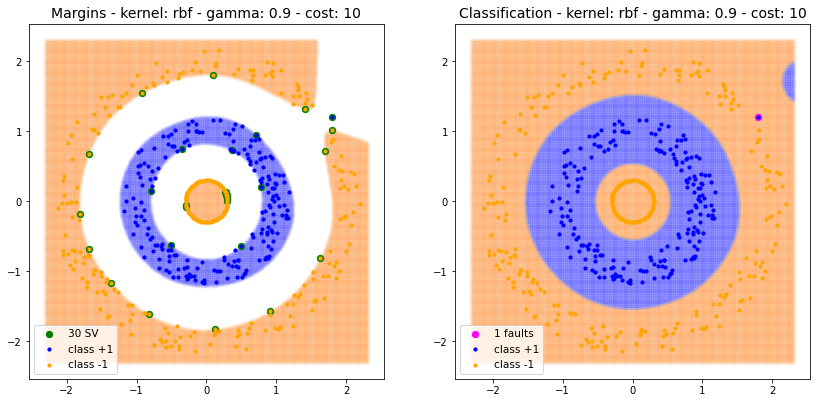

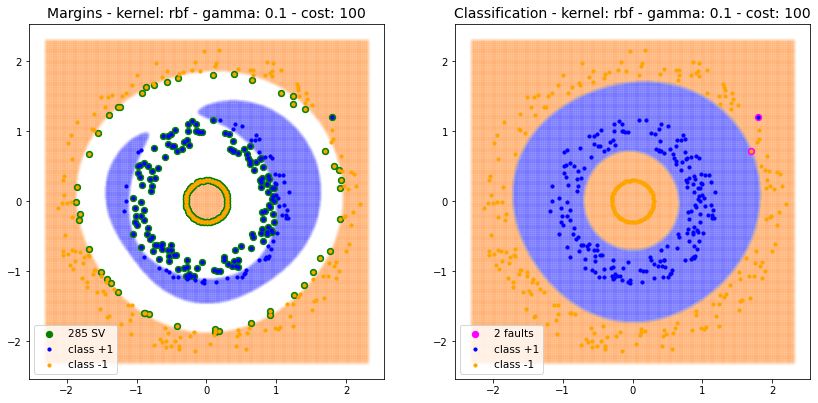

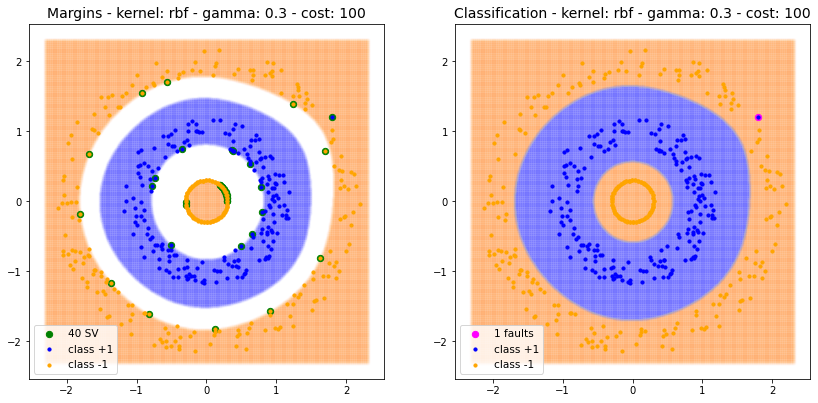

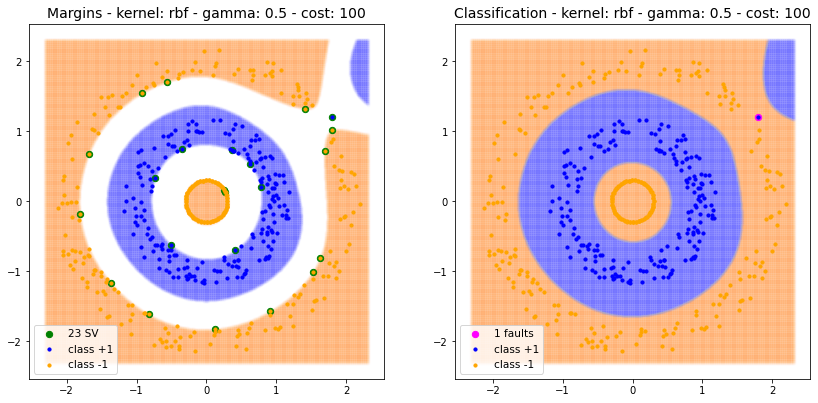

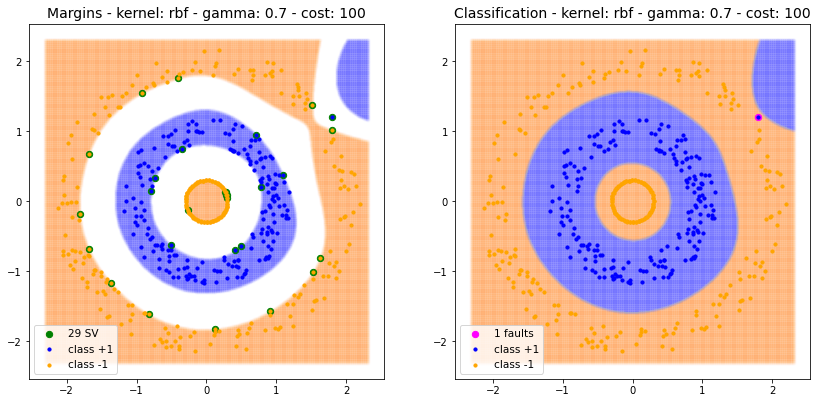

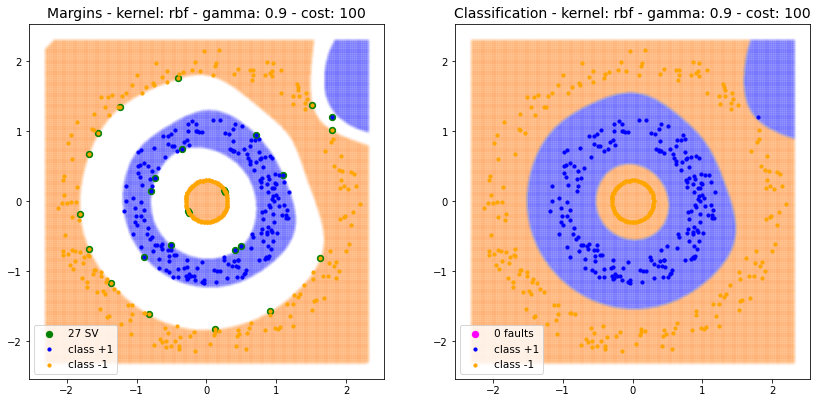

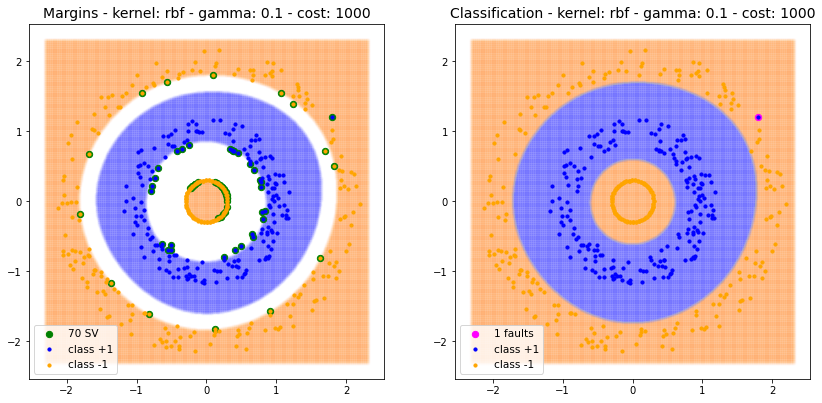

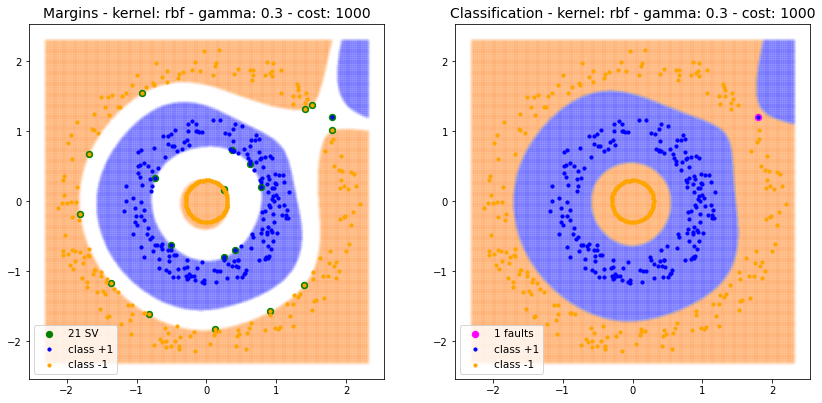

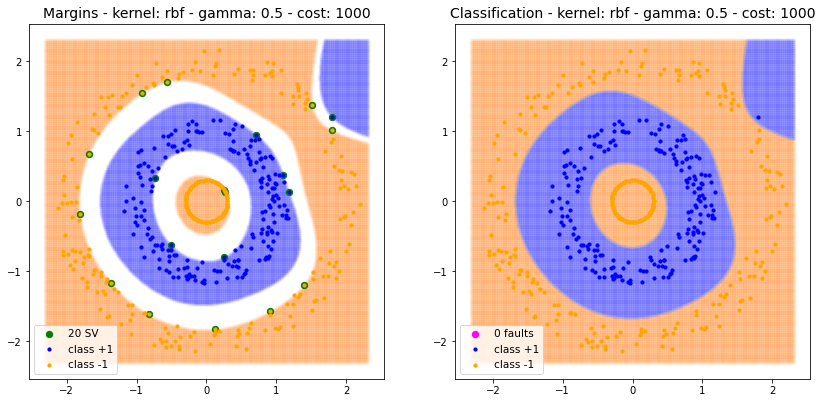

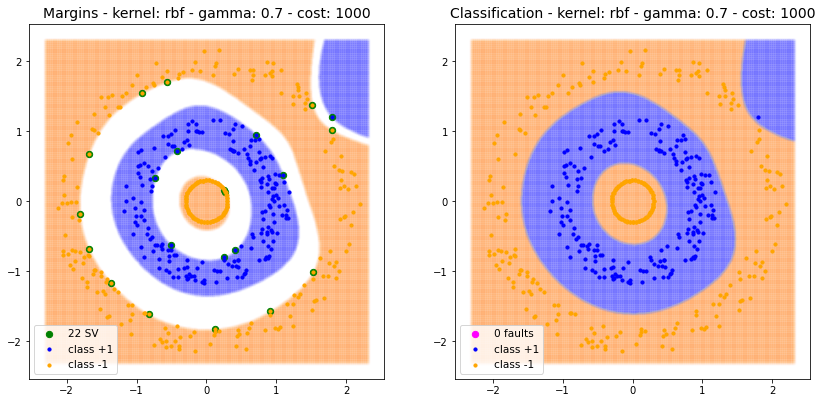

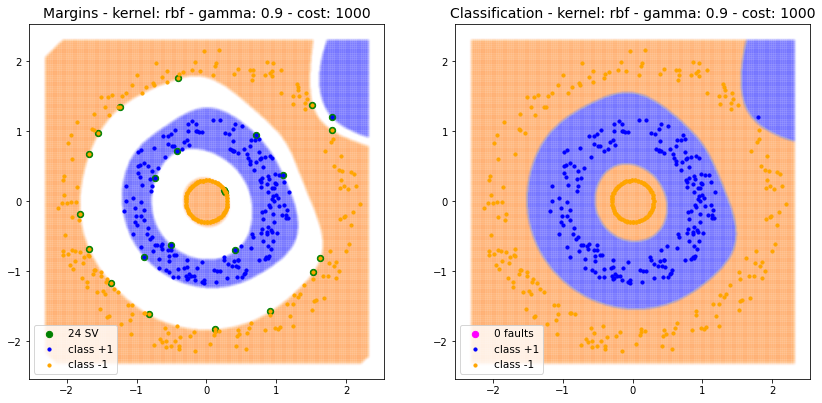

In [15]:
#This cell is just to discover the behaviour of SVM given extra point
cost_values = range(-1,4)
gamma_values = [0.1,0.3,0.5,0.7,0.9]

for cost in cost_values:
    iter_Gamma(gamma_values,10**cost,X_new,y_new)

<h3 style="color:rgb(210,90,80)">Question 4:</h3>

What observations can you make from your plots? Tick the correct boxes:

    
_k)  For relatively low costs (e.g. $C\le 1$) and an appropriately chosen $\gamma$ (e.g. $0.9$) the classifier correctly classifies all points except the outlier. </u><br>
_l)  For relatively high costs (e.g. $C\geq 100$) the classifier always, i.e. independent of $\gamma$, shows a region of the positive class near the outlier.<br>
_m)  Classifiers with high costs ($C\geq 100$ say) and high $\gamma$ ($ \gamma \geq 0.5$) are susceptible to overfitting.</u><br>



In [16]:
k_ = True
l_ = False
m_ = True